In [56]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy import stats as stats
import matplotlib.pyplot as plt
from scipy import stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import scipy
import statsmodels.api as sm
# import pandas as pd
from statsmodels.tsa.stattools import coint, grangercausalitytests
import matplotlib
from itertools import groupby, count
import pickle
from dateutil.parser import parse
import datetime
from scipy.optimize import brentq 
import traceback
# from google.colab import files
%matplotlib inline

In [3]:
# Lets Build PCA from scratch

In [4]:
np.random.seed(20)


In [5]:
#Create a random time series

x = np.cumsum(np.random.randn(200)) + 100

In [6]:
y = x*2 + np.random.randn(200)- 100

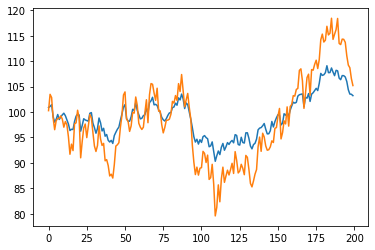

In [9]:
#plot both the Series
plt.plot(x)
plt.plot(y)

In [14]:
#first pca step: De Meaning of series
x_ = x - np.mean(x)
y_ = y - np.mean(y)

In [16]:
#collect de-meaned series in an array
R = np.array([x_ , y_])

In [18]:
#calaculate the cov
S = np.cov(R)
S

array([[17.01547369, 33.69556579],
       [33.69556579, 67.62804956]])

In [19]:
#calculate the eigen value and eigen vector of co variance matrix
EIG= np.linalg.eig(S)


In [20]:
print(EIG[0])

[ 0.18152713 84.46199612]


In [21]:
EV = EIG[1]

In [22]:
EV

array([[-0.89457408, -0.4469197 ],
       [ 0.4469197 , -0.89457408]])

In [23]:
EIG

(array([ 0.18152713, 84.46199612]),
 array([[-0.89457408, -0.4469197 ],
        [ 0.4469197 , -0.89457408]]))

In [24]:
# principal Component is basically the eigen vector
#plotting the eigen vector
xx = np.linspace(min(R[0,:]), max(R[0,:]),200)

In [25]:
#slope of first eigen vector
dx1 = EV[0,0]
dy1 = EV[1,0]
slope1 = dy1/dx1

In [26]:
#slope of 2nd eigen vector
dx2 = EV[0,1]
dy2 = EV[1,1]

slope2= dy2/dx2

In [27]:
#Multiple th eslope with x so we get the y
yy1 = slope1*xx
yy2 = slope2*xx

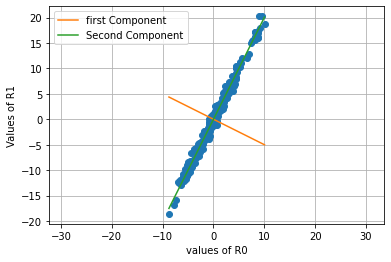

In [29]:
#plot de meaned x-y correlation
plt.plot(R[0,:] , R[1,:],'o')

#plot The first pricipal component
plt.plot(xx, yy1, label ='first Component')

#plot the second Pricipal component
plt.plot(xx, yy2 , label = 'Second Component')

plt.legend()
plt.xlabel('values of R0')
plt.ylabel('Values of R1')
plt.grid()
plt.axis('Equal');

In [30]:
#Volatility- Curve Modelling

In [33]:
# uploaded = files.upload()

object = pd.read_pickle(r'../File/vol_curves.pick')

In [35]:
vol_curves = pickle.load(open('../File/vol_curves.pick','rb'))

Text(0, 0.5, 'implied volatility')

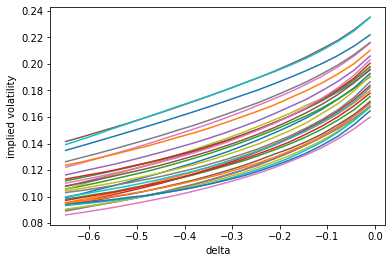

In [37]:
delta = np.linspace(-0.65, -0.01 , 20)
for curve in vol_curves:
    plt.plot(delta,curve)
plt.xlabel('delta')
plt.ylabel('implied volatility')

In [38]:
eig = np.linalg.eig(np.cov((vol_curves - np.mean(vol_curves, axis =0))))

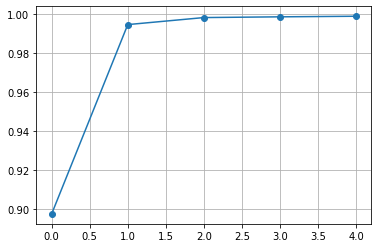

In [39]:
plt.plot(np.cumsum(np.real((np.sort(eig[0])[-5:])[::-1]/sum(eig[0]))),'-o')
plt.grid()

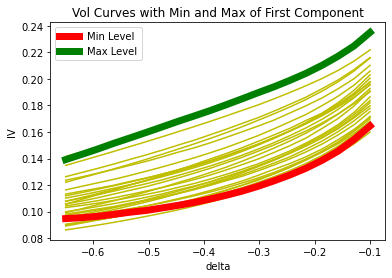

In [40]:
X= np.linspace(-0.65 , -0.1 , 20)
for n in vol_curves:
    plt.plot(X, n , 'y')

max_level = np.argmax(np.real(eig[1])[:,0])
min_level = np.argmin(np.real(eig[1])[:,0])
plt.plot(X,vol_curves[max_level],'r-',lw=7,label='Min Level')
plt.plot(X,vol_curves[min_level],'g-',lw=7,label='Max Level')
plt.xlabel('delta')
plt.ylabel('IV')
plt.title('Vol Curves with Min and Max of First Component')
plt.legend()

curvature: 0.007886463858959025
curvature: 0.0067534898690382456
curvature: 0.006744818036329023
curvature: 0.008132509951451011
curvature: 0.008744329681090637
curvature: 0.007648235964239067
curvature: 0.0070913399157014195
curvature: 0.00690018481196282
curvature: 0.007782693084117498
curvature: 0.009489105587569088
curvature: 0.009561085028184396
curvature: 0.00783978819383055
curvature: 0.008007345541393665
curvature: 0.007331953769233485
curvature: 0.006319386105640298
curvature: 0.006020794805663782
curvature: 0.006558010927987856
curvature: 0.005913353970232682
curvature: 0.0051524968391334774
curvature: 0.0062482923776809585
curvature: 0.004962718579029135
curvature: 0.007529818083328796
curvature: 0.007718209594251874
curvature: 0.008964219707787907
curvature: 0.007899899532307186
curvature: 0.007666420160095
curvature: 0.00925788675443448
curvature: 0.010192498467904695
curvature: 0.009539427354401109
curvature: 0.00863161360114846
Max curvature: 0.00925788675443448


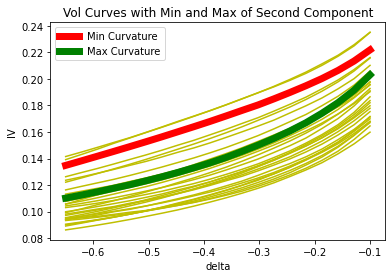

In [41]:
X = np.linspace(-0.65,-0.1,20)
for n in vol_curves:
  plt.plot(X,n,'y')
  print('curvature:',sum(np.diff(n,2)))
max_level = np.argmax(np.real(eig[1])[:,1])
min_level = np.argmin(np.real(eig[1])[:,1])
plt.plot(X,vol_curves[max_level],'r-',lw=7,label='Min Curvature')
plt.plot(X,vol_curves[min_level],'g-',lw=7,label='Max Curvature')
plt.xlabel('delta')
plt.ylabel('IV')
plt.title('Vol Curves with Min and Max of Second Component')
plt.legend()
print('Max curvature:',sum(np.diff(vol_curves[min_level],2)))

tilt: 0.09356460691508237
tilt: 0.08438601164857384
tilt: 0.08457507697054834
tilt: 0.08967622399256955
tilt: 0.08174408695818951
tilt: 0.07740195686434292
tilt: 0.07368297984119891
tilt: 0.07887439503616842
tilt: 0.0765572789787289
tilt: 0.07469481116228247
tilt: 0.06982295398466591
tilt: 0.07492566756796991
tilt: 0.07727690727294456
tilt: 0.08075987723826514
tilt: 0.0877703204190507
tilt: 0.09368547502865793
tilt: 0.09359317319103119
tilt: 0.08982263782484295
tilt: 0.09168578559899646
tilt: 0.09587955891665123
tilt: 0.08705921177408801
tilt: 0.08659340941433559
tilt: 0.08600911548257575
tilt: 0.08731938473892188
tilt: 0.08956043296714612
tilt: 0.08787943810321924
tilt: 0.09288369240163902
tilt: 0.08348055194664973
tilt: 0.08676232845244691
tilt: 0.0821600704933817
Max tilt: 0.09587955891665123


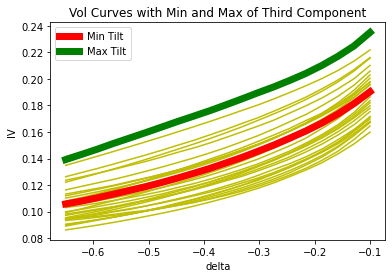

In [42]:
X = np.linspace(-0.65,-0.1,20)
for n in vol_curves:
  plt.plot(X,n,'y')
  print('tilt:',sum(np.diff(n,1)))
max_level = np.argmax(np.real(eig[1])[:,2])
min_level = np.argmin(np.real(eig[1])[:,2])
plt.plot(X,vol_curves[max_level],'r-',lw=7,label='Min Tilt')
plt.plot(X,vol_curves[min_level],'g-',lw=7,label='Max Tilt')
plt.xlabel('delta')
plt.ylabel('IV')
plt.title('Vol Curves with Min and Max of Third Component')
plt.legend()
print('Max tilt:',sum(np.diff(vol_curves[min_level],1)))

#### Building the Stock Index 

In [43]:
data = yf.download('FB FB AMZN AAPL NFLX GOOGL MSFT', start="2012-06-01", end="2021-05-30")

[*********************100%***********************]  6 of 6 completed


In [46]:
data.head()

Adj Close                                                          \
                 AAPL        AMZN         FB       GOOGL       MSFT      NFLX   
Date                                                                            
2012-05-31  78.689240  212.910004  29.600000  290.711395  23.938192  9.062857   
2012-06-01  76.409172  208.220001  27.719999  285.776642  23.331331  8.992857   
2012-06-04  76.858650  214.570007  26.900000  289.580322  23.413336  9.285714   
2012-06-05  76.659782  213.210007  25.868999  285.476349  23.376431  9.261428   
2012-06-06  77.835228  217.639999  26.809999  290.581268  24.069403  9.411428   

                Close                                     ...       Open  \
                 AAPL        AMZN         FB       GOOGL  ...         FB   
Date                                                      ...              
2012-05-31  82.532860  212.910004  29.600000  290.711395  ...  28.540001   
2012-06-01  80.141426  208.220001  27.719999  285.776642  ...  28.930000   
2012-06-04  80.612854  214.570007  26.900000  289.580322  ...  27.200001   
2012-06-05  80.404282  213.210007  25.868999  285.476349  ...  26.700001   
2012-06-06  81.637138  217.639999  26.809999  290.581268  ...  26.070000   

                                                Volume                      \
                 GOOGL       MSFT      NFLX       AAPL     AMZN         FB   
Date                                                                         
2012-05-31  294.910461  29.290001  9.534285  122977603  4944924  111639200   
2012-06-01  285.926788  28.799999  8.700000  130245094  3953691   41855500   
2012-06-04  285.376251  28.620001  9.035714  139247129  4302341   35230290   
2012-06-05  288.028809  28.500000  9.287142   97053376  3546441   42473262   
2012-06-06  288.529297  28.879999  9.380000  100362262  2715054   61487019   

                                         
              GOOGL      MSFT      NFLX  
Date                                     
2012-05-31  5933161  39142318  53846982  
2012-06-01  3058314  56641282  35596708  
2012-06-04  2433785  47928161  35297038  
2012-06-05  2340476  45715327  24070158  
2012-06-06  2096172  46860486  30689512  

[5 rows x 36 columns]

<AxesSubplot:xlabel='Date'>

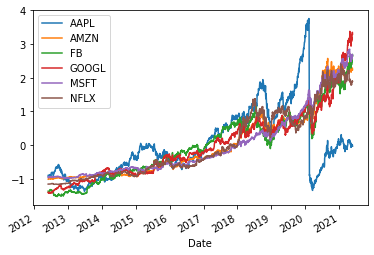

In [45]:
#plot thenormalized daata set 
normalized = (data['Adj Close']-data['Adj Close'].mean())/data['Adj Close'].std()
normalized.plot()

In [48]:
#Running valuesPCA with the SKLEARN PCA function
pca = PCA(1).fit(data['Adj Close'].values.T)

In [49]:
#Generate the index from the Pricipal Component
index = pca.components_[0].T

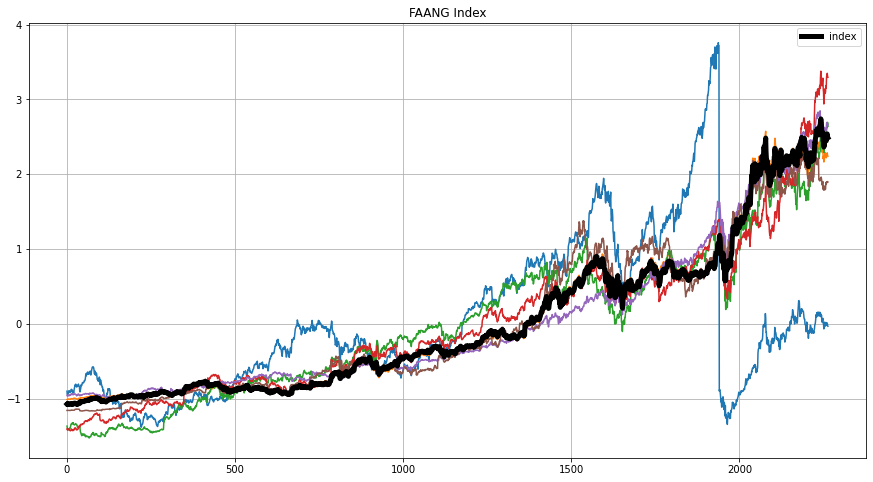

In [50]:
plt.figure(figsize=[15,8])
plt.plot(normalized.values)
plt.plot((index-np.mean(index))/np.std(index),'k',lw=5,label='index')
plt.legend()
plt.title('FAANG Index')
plt.grid();

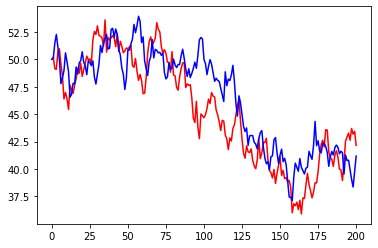

In [51]:
def make_coint_0(N, T0 = [0,0], sigma = [1, 1] , c = [0.1 , 0.1]):
    X = [0]
    Y = [0]
    
    for i in range(N):
        rx = np.random.randn()*sigma[0] - c[0]*(X[-1] - Y[-1])
        ry = np.random.randn()*sigma[1] + c[1]*(X[-1] - Y[-1])
        X.append(X[-1]+rx)
        Y.append(Y[-1]+ry)
    return np.array(X)+T0[0],np.array(Y)+T0[1]

X,Y = make_coint_0(200,T0=[50,50],c=[0.1,0.1])
plt.plot(X,'r-',Y,'b-');


In [53]:
#Cointuses the augmented Engle _ Granger Two step cointergration
coint(X, Y)

(-4.203816307857689,
 0.003599549076991692,
 array([-3.95203768, -3.36685108, -3.065724  ]))

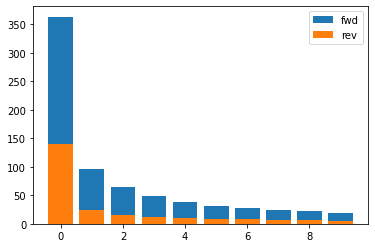

In [57]:
X,Y = make_coint_0(200,T0=[50,50],c=[0.8,0.6])

lags = 10

# Calculating the EG-Test in one direction
result = grangercausalitytests(np.array([X,Y]).T, lags, verbose=False)

# Extracting results
res_fwd = [(list(result.values())[lag][0]['ssr_ftest'][0]) for lag in range(lags)]

# Calculating the EG-Test in reverse direction
result = grangercausalitytests(np.array([Y,X]).T, lags, verbose=False)

# Extracting results
res_rev = [(list(result.values())[lag][0]['ssr_ftest'][0]) for lag in range(lags)]

plt.bar(range(lags),res_fwd,label='fwd')
plt.bar(range(lags),res_rev,label='rev')
plt.legend()


In [58]:
# Cointegration of FAANG stocks
coints = []
for i in range(data['Adj Close'].values.shape[1]):
    for k in range(i,data['Adj Close'].values.shape[1]):
        if not i==k:
            coints.append(coint(data['Adj Close'].values.T[i],data['Adj Close'].values.T[k])[0])

            print(i,k,coints[-1])

0 1 -2.6759140262916477
0 2 -2.7294002865580174
0 3 -2.5329995314854017
0 4 -2.615856097703984
0 5 -2.8038489225600816
1 2 -2.157239192930619
1 3 -2.330765942777214
1 4 -2.366383670292708
1 5 -3.215462800153917
2 3 -2.8847933599493047
2 4 -2.124631808171633
2 5 -2.3663849080078827
3 4 -1.6939708446005892
3 5 -1.7075271893204191
4 5 -1.32050911368229


In [59]:
def get_resids(d):
    pca = PCA(1).fit(d.T)
    index= pca.components_[0]
    mm = [sm.OLS(s, index).fit() for s in d.T]
    return list(map(lambda x: x.resid, mm))

def Zscore(X):
    return np.array((X - np.mean(X)) / np.std(X))

In [60]:
data2 = yf.download("AAPL NFLX", start="2019-01-01", end="2021-05-30")

[*********************100%***********************]  2 of 2 completed


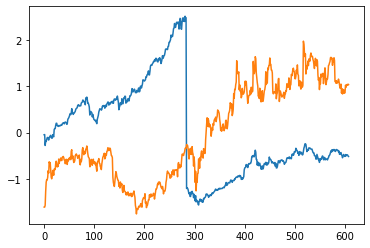

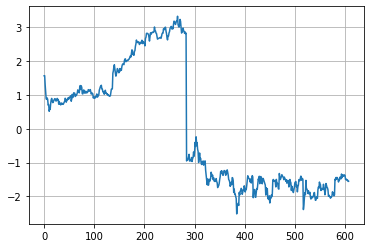

In [61]:
aapl = data2['Adj Close']['AAPL']
nflx = data2['Adj Close']['NFLX']
plt.plot(Zscore(aapl))
plt.plot(Zscore(nflx))

plt.show()

plt.plot(Zscore(aapl)-Zscore(nflx))
plt.grid()
